In [9]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.1.0-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl (16.2 MB)
Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl (6.3 MB)
Using cached shapely-2.1.0-cp312-cp312-win_amd64.whl (1.7 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, Eq, solve
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import geopandas as gpd
from shapely.geometry import Point


In [4]:
data = pd.read_csv('C:/Users/danie/OneDrive/Documentos/TALLER_TAXI_TRIP/data/yellow_tripdata_2016-03.csv')

In [5]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [7]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,1.040395e+00,-7.293679e+01,4.018050e+01,1.340920e+00,1.279508e+01,3.455600e-01,4.976363e-01,1.792582e+00,3.152554e-01,2.997199e-01,1.604582e+01
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,5.807342e-01,8.696974e+00,4.790940e+00,4.902621e-01,1.340979e+02,4.563069e-01,4.863319e-02,2.549124e+00,1.751526e+00,1.230647e-02,1.343578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-3.760000e+02,-5.850000e+01,-1.000000e+00,-2.000000e+01,-1.604000e+01,-3.000000e-01,-3.763000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,1.000000e+00,-7.399125e+01,4.073462e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,1.000000e+00,-7.397961e+01,4.075375e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,1.000000e+00,-7.396228e+01,4.076910e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.776000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,9.900000e+01,0.000000e+00,5.079786e+01,4.000000e+00,4.294967e+05,8.000000e+01,7.930000e+01,8.500000e+02,1.410320e+03,3.000000e-01,4.295622e+05


In [ ]:
data = data.drop(columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag'])

In [15]:

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60.0

In [16]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.916667
1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.100000
2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.100000
3,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.000000
4,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.000000


In [19]:
data = data.drop(columns= ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

Text(0.5, 1.0, 'Distribution of Total Amount')

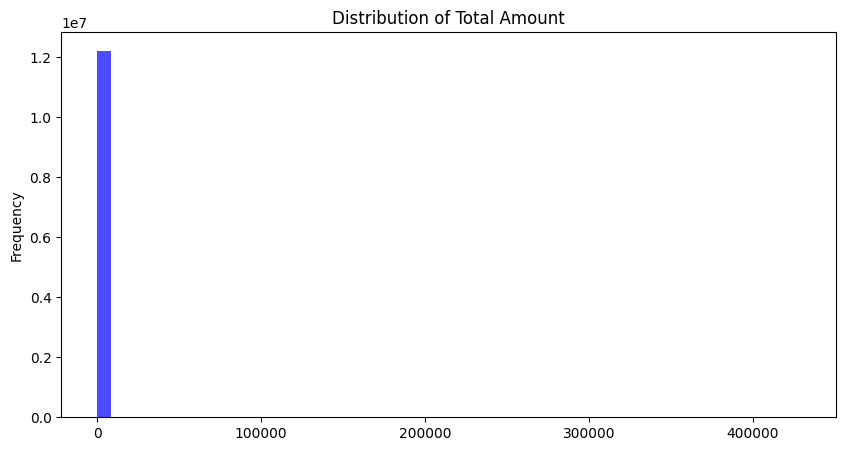

In [21]:
data['total_amount'].plot(kind='hist', bins=50, figsize=(10, 5), color='blue', alpha=0.7)
plt.title('Distribution of Total Amount')

In [23]:
data['total_amount'] = data['total_amount'].replace(0, np.nan)

In [24]:
data['total_amount'].isnull().sum()

1267

In [27]:
data['total_amount'].fillna(data['total_amount'].median(), inplace=True)


C:\Users\danie\AppData\Local\Temp\ipykernel_25936\1686529676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_amount'].fillna(data['total_amount'].median(), inplace=True)


In [28]:
data['total_amount'].isnull().sum()

0

Text(0.5, 1.0, 'Distribution of Total Amount')

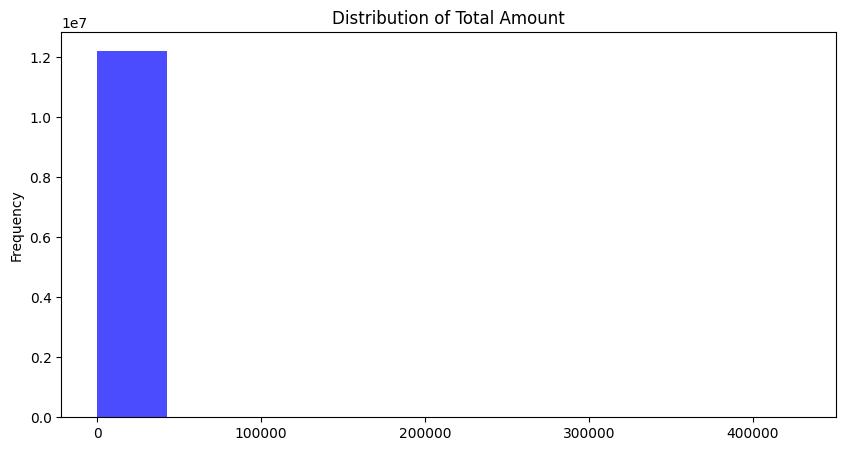

In [31]:
data['total_amount'].plot(kind='hist', bins=10, figsize=(10, 5), color='blue', alpha=0.7)
plt.title('Distribution of Total Amount')

In [33]:
data['total_amount'].describe()

count    1.221095e+07
mean     1.604704e+01
std      1.343577e+02
min     -3.763000e+02
25%      8.750000e+00
50%      1.180000e+01
75%      1.776000e+01
max      4.295622e+05
Name: total_amount, dtype: float64

In [34]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [35]:
data = remove_outliers(data, 'total_amount')

Text(0.5, 1.0, 'Distribution of Total Amount')

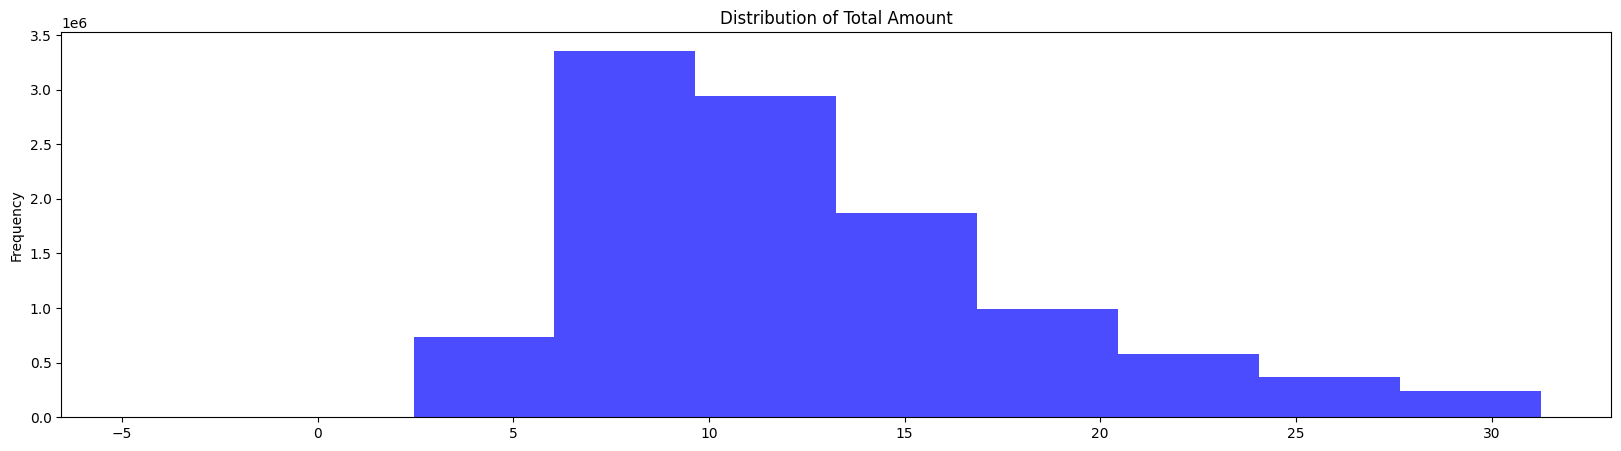

In [38]:
data['total_amount'].plot(kind='hist', bins=10, figsize=(20, 5), color='blue', alpha=0.7)
plt.title('Distribution of Total Amount')

In [43]:
data= data[data['total_amount'] > 0]

In [44]:
data['total_amount'].describe()

count    1.109349e+07
mean     1.253483e+01
std      5.680060e+00
min      1.000000e-02
25%      8.300000e+00
50%      1.116000e+01
75%      1.536000e+01
max      3.126000e+01
Name: total_amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Amount')

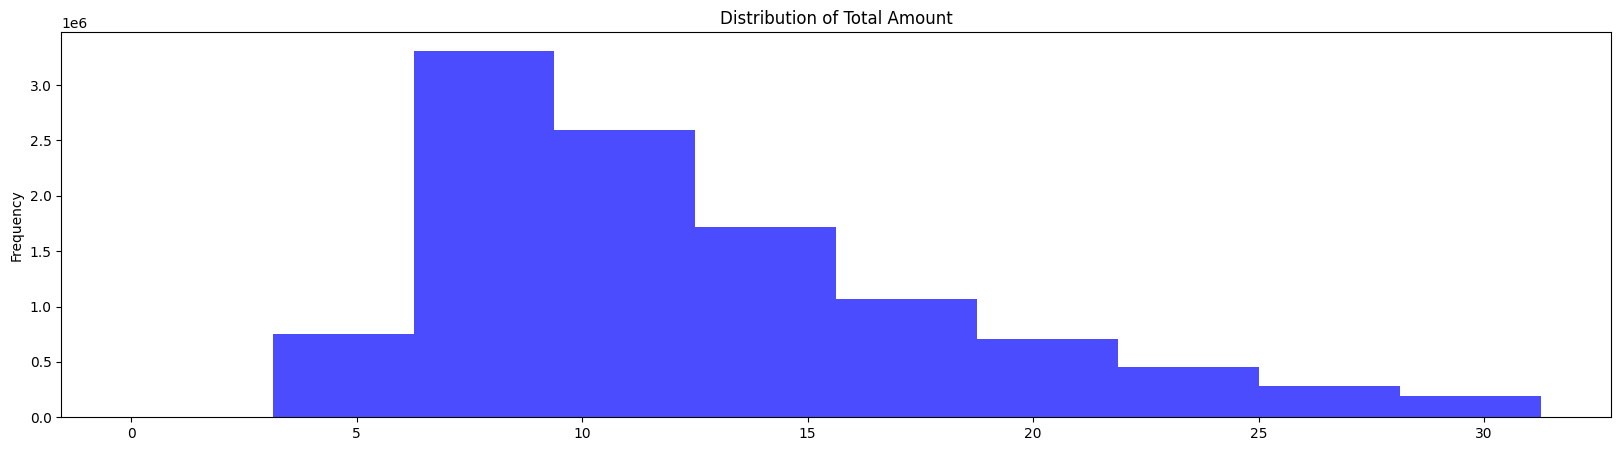

In [45]:
data['total_amount'].plot(kind='hist', bins=10, figsize=(20, 5), color='blue', alpha=0.7)
plt.title('Distribution of Total Amount')

In [48]:
data = data.drop(columns=['dropoff_longitude', 'dropoff_latitude', 'pickup_longitude', 'pickup_latitude'])

In [49]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,1,2.50,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,7.916667
1,1,2.90,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,11.100000
5,5,5.92,1,23.5,1.0,0.5,5.06,0.0,0.3,30.36,0.000000
6,6,5.72,2,23.0,0.5,0.5,0.00,0.0,0.3,24.30,0.000000
7,1,6.20,3,20.5,0.5,0.5,0.00,0.0,0.3,21.80,16.050000


In [50]:
data.isnull().sum()

passenger_count          0
trip_distance            0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
dtype: int64

In [51]:
data['trip_duration'] = data['trip_duration'].replace(0, np.nan)
data['trip_duration'].isnull().sum()

11057

In [52]:
data['trip_duration'].describe()

count    1.108243e+07
mean     1.348138e+01
std      8.846583e+01
min     -5.052023e+04
25%      6.216667e+00
50%      1.006667e+01
75%      1.540000e+01
max      1.161454e+05
Name: trip_duration, dtype: float64

In [53]:
from sklearn.impute import KNNImputer

In [54]:
data['trip_duration'] =data['trip_duration'].apply(lambda x: np.nan if x <= 0 else x)

In [55]:
data['trip_duration'].isnull().sum()

11145

In [56]:
impute_data = data[['trip_distance', 'trip_duration']].copy()

In [57]:
imputer = KNNImputer(n_neighbors=5) 
imputed_array = imputer.fit_transform(impute_data)

In [58]:
data['trip_duration'] = imputed_array[:, 1]


In [59]:
data['trip_duration'].isnull().sum()

0

Text(0.5, 1.0, 'Distribution of Trip Duration')

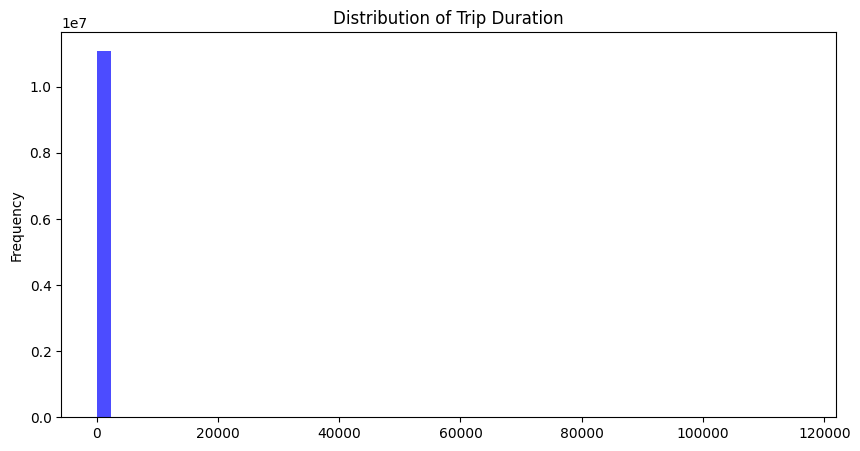

In [60]:
data['trip_duration'].plot(kind='hist', bins=50, figsize=(10, 5), color='blue', alpha=0.7)
plt.title('Distribution of Trip Duration')

In [61]:
data['trip_duration'].describe()

count    1.109349e+07
mean     1.359231e+01
std      6.462432e+01
min      1.666667e-02
25%      6.200000e+00
50%      1.005000e+01
75%      1.538333e+01
max      1.161454e+05
Name: trip_duration, dtype: float64

In [62]:
data = remove_outliers(data, 'trip_duration')

In [63]:
data['trip_duration'].describe()

count    1.084359e+07
mean     1.101750e+01
std      6.226041e+00
min      1.666667e-02
25%      6.116667e+00
50%      9.866667e+00
75%      1.493333e+01
max      2.915000e+01
Name: trip_duration, dtype: float64

<Axes: ylabel='Frequency'>

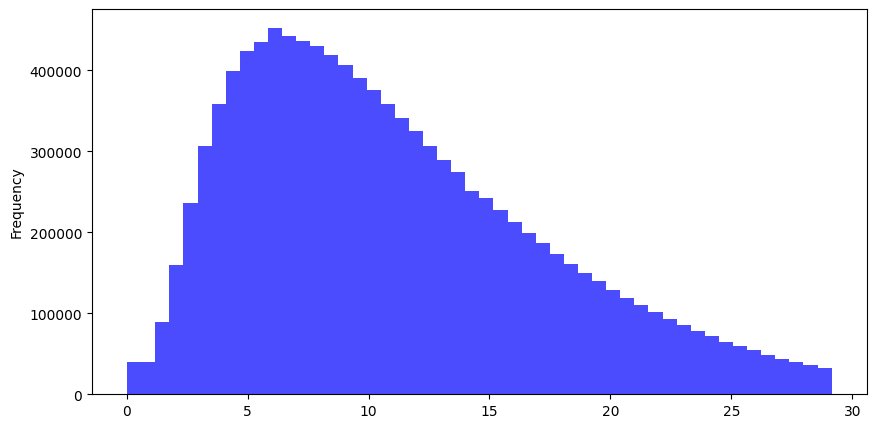

In [64]:
data['trip_duration'].plot(kind='hist', bins=50, figsize=(10, 5), color='blue', alpha=0.7)

<Axes: ylabel='Frequency'>

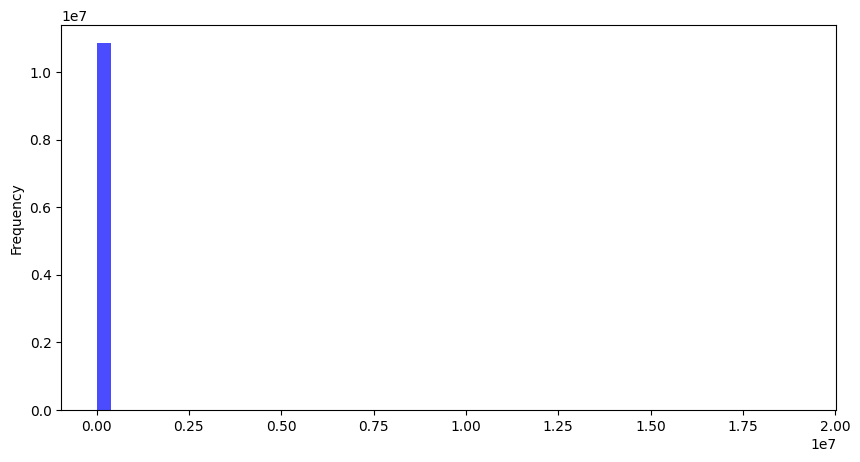

In [65]:
data['trip_distance'].plot(kind='hist', bins=50, figsize=(10, 5), color='blue', alpha=0.7)

In [66]:
data = remove_outliers(data, 'trip_duration')

Text(0.5, 1.0, 'Distribution of Trip Duration')

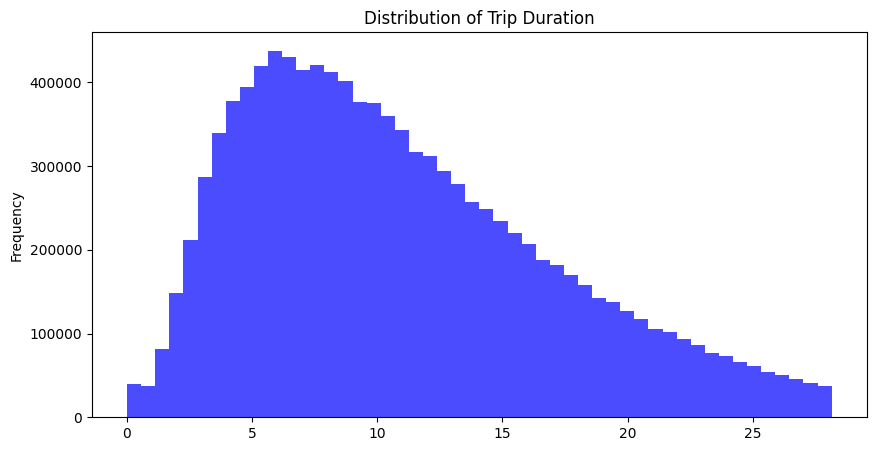

In [68]:
data['trip_duration'].plot(kind='hist', bins=50, figsize=(10, 5), color='blue', alpha=0.7)
plt.title('Distribution of Trip Duration')

In [69]:
data.describe()

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07,1.078646e+07
mean,1.653927e+00,5.011904e+00,1.349513e+00,9.701565e+00,3.362118e-01,4.994519e-01,1.333210e+00,1.687613e-02,2.999541e-01,1.218860e+01,1.092416e+01
std,1.309735e+00,6.369387e+03,4.910569e-01,4.590345e+00,3.737112e-01,2.509635e-02,1.322118e+00,3.131306e-01,3.707709e-03,5.304468e+00,6.108575e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-5.850000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.400000e-01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,6.100000e+00
50%,1.000000e+00,1.500000e+00,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.200000e+00,0.000000e+00,3.000000e-01,1.100000e+01,9.816667e+00
75%,2.000000e+00,2.500000e+00,2.000000e+00,1.200000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.480000e+01,1.481667e+01
max,9.000000e+00,1.907263e+07,4.000000e+00,3.080000e+01,2.000000e+01,5.930000e+01,3.069000e+01,2.700000e+01,3.000000e-01,3.125000e+01,2.815000e+01


In [70]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,1,2.50,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,7.916667
1,1,2.90,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,11.100000
5,5,5.92,1,23.5,1.0,0.5,5.06,0.0,0.3,30.36,20.050000
6,6,5.72,2,23.0,0.5,0.5,0.00,0.0,0.3,24.30,20.130000
7,1,6.20,3,20.5,0.5,0.5,0.00,0.0,0.3,21.80,16.050000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10786465 entries, 0 to 12210947
Data columns (total 11 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   passenger_count        int64   
 1   trip_distance          float64 
 2   payment_type           category
 3   fare_amount            float64 
 4   extra                  float64 
 5   mta_tax                float64 
 6   tip_amount             float64 
 7   tolls_amount           float64 
 8   improvement_surcharge  float64 
 9   total_amount           float64 
 10  trip_duration          float64 
dtypes: category(1), float64(9), int64(1)
memory usage: 915.5 MB


In [73]:
data['payment_type'] = data['payment_type'].astype('category')

In [75]:
catvars = data.select_dtypes(include=['object', 'category']).columns.tolist()
numvars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

Payment type

1 credit card

2 Cash

3 No charge

4 Dispute

Text(0.5, 1.0, 'Boxplot of Total Amount by Payment Type')

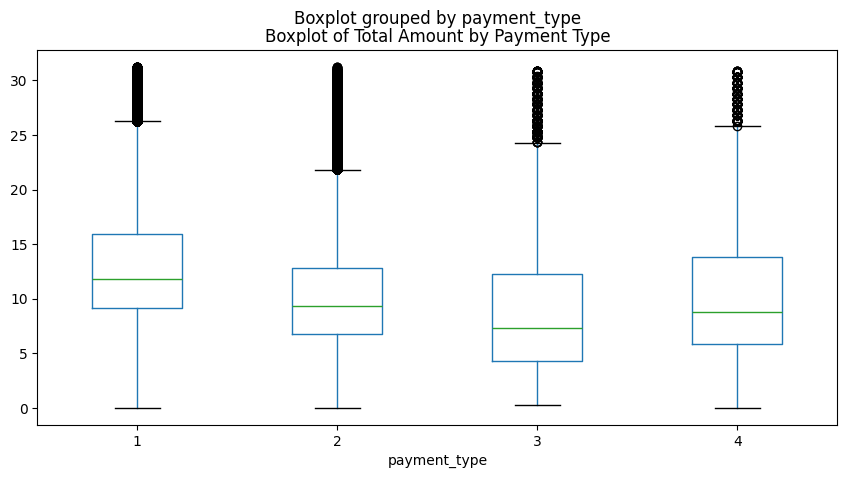

In [77]:
boxplot = data.boxplot(column='total_amount', by='payment_type', figsize=(10, 5), grid=False)
plt.title('Boxplot of Total Amount by Payment Type')




In [ ]:
for col in var_num:
    if col not in 'rating':  # This is correct, skip 'rating' in the loop
        plt.figure(figsize=(10, 6))
        # Use df[col] and df['rating'] to access original data
        plt.hexbin(x=df[col], y=df['rating'], gridsize=30, cmap='Blues')
        plt.title(f'Relación entre {col} y Rating', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Rating')
        plt.show()

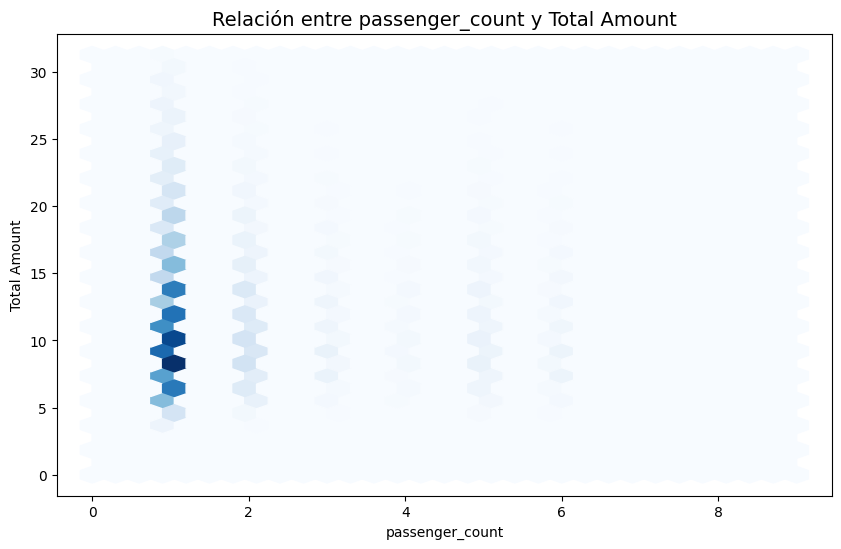

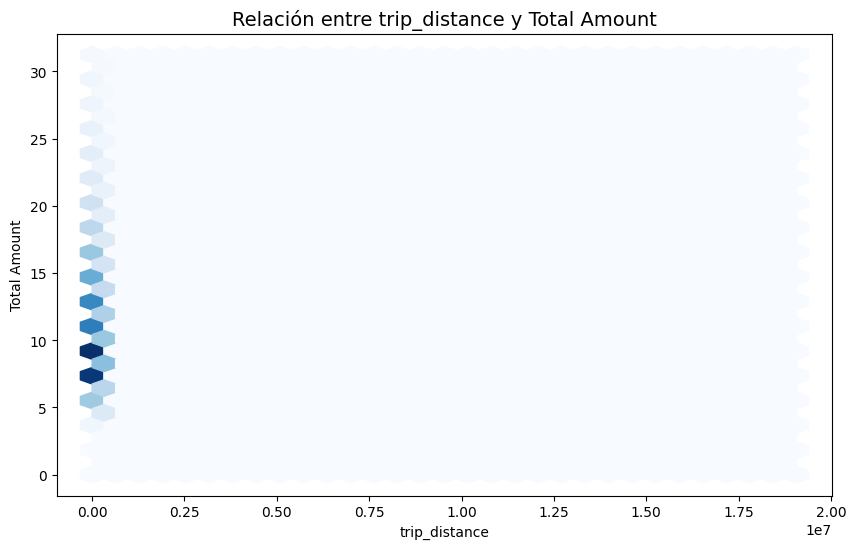

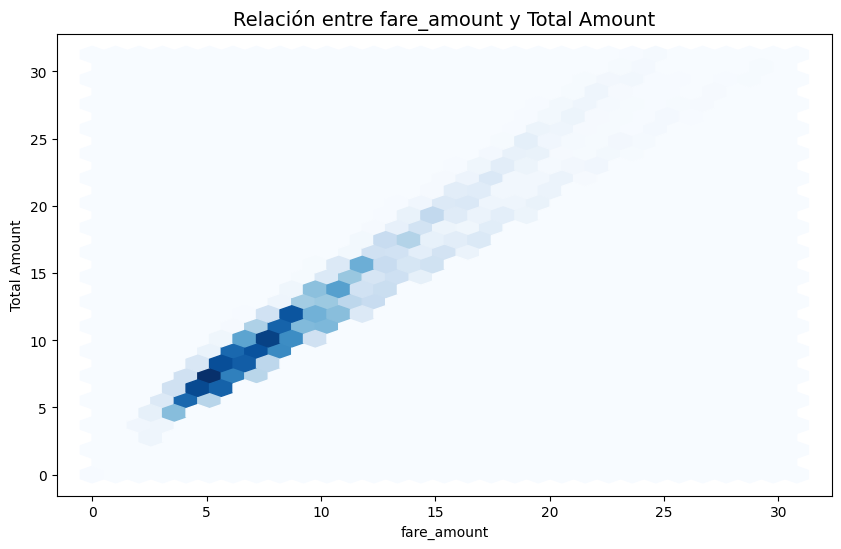

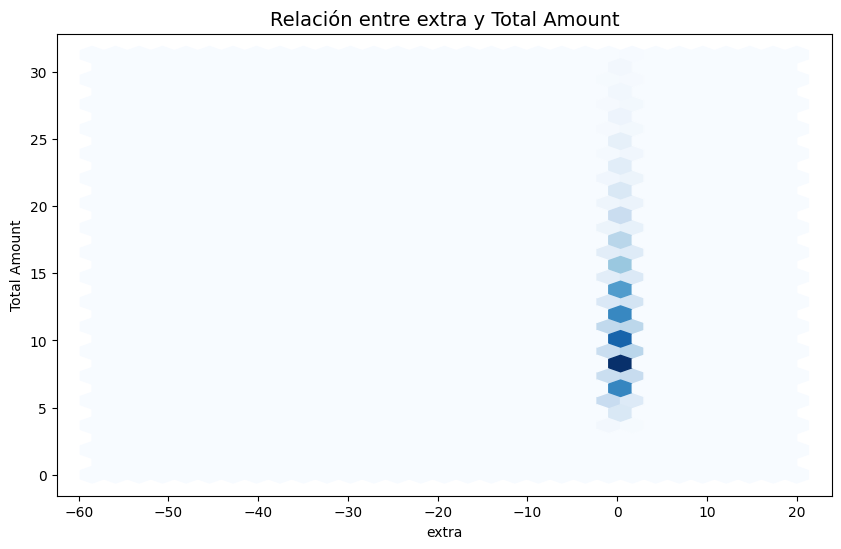

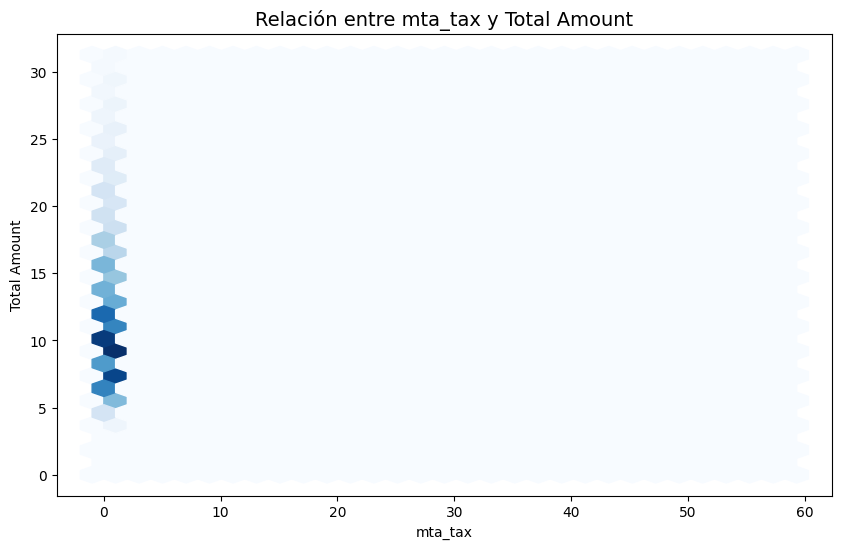

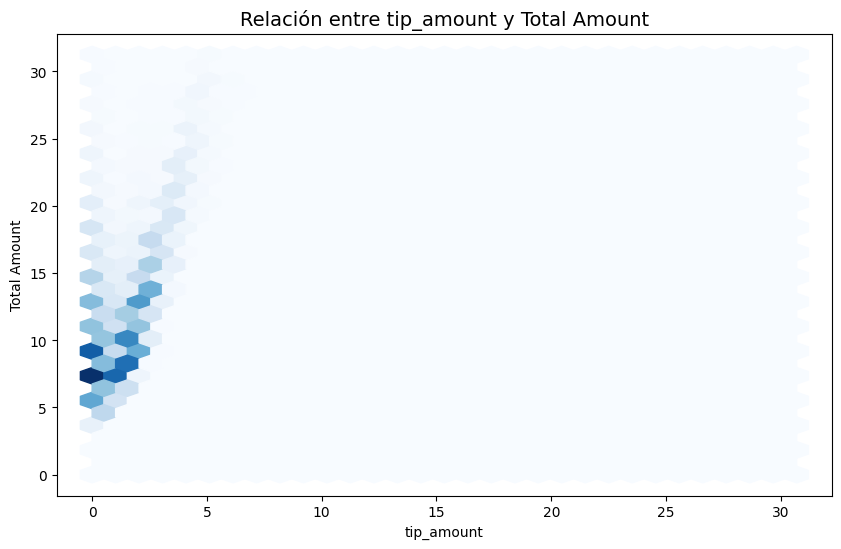

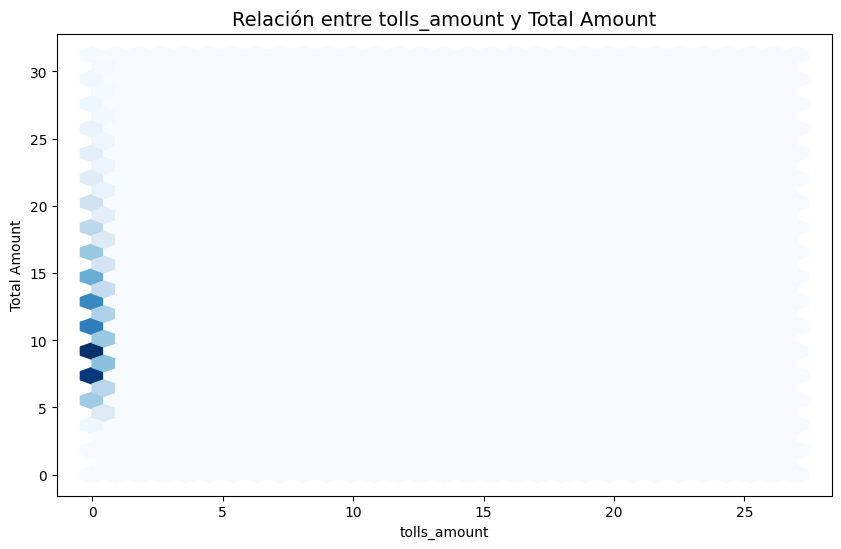

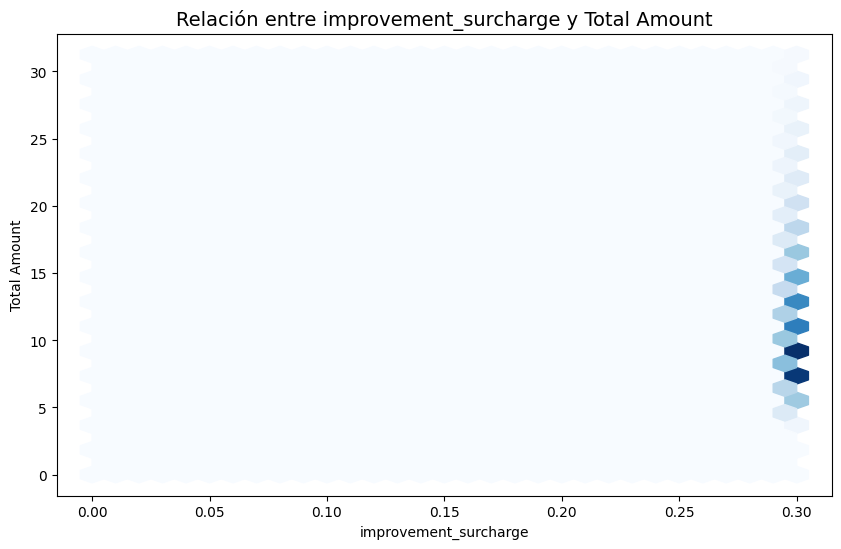

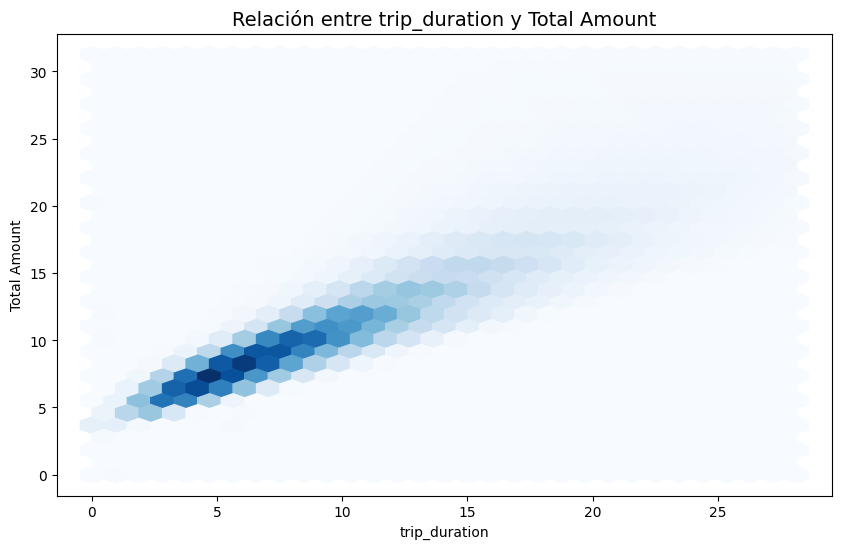

In [79]:
for var in numvars:
    if var not  in 'total_amount':
        plt.figure(figsize=(10, 6))
        plt.hexbin(x=data[var], y=data['total_amount'], gridsize=30, cmap='Blues')
        plt.title(f'Relación entre {var} y Total Amount', fontsize=14)
        plt.xlabel(var)
        plt.ylabel('Total Amount')
        plt.show()
